In [6]:
glass.head(6)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [7]:
le = LabelEncoder()
le.fit(glass['Type'])
print(list(le.classes_))
glass['Type'] = le.transform(glass['Type'])

[1, 2, 3, 5, 6, 7]


In [8]:
X=glass[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]

In [9]:
g_matrix = pd.DataFrame.as_matrix(X)

In [10]:
cluster_model = KMeans(n_clusters=3, random_state=10)

In [11]:
cluster_model.fit(g_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [54]:
cluster_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 3, 3, 2, 1, 2, 1, 1, 1, 1, 0, 0, 2, 2,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [12]:
cluster_labels = cluster_model.fit_predict(g_matrix)

In [13]:
g=glass

In [14]:
g['pred'] = cluster_labels

In [15]:
g.head(6)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,pred
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,0,0
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,0,0


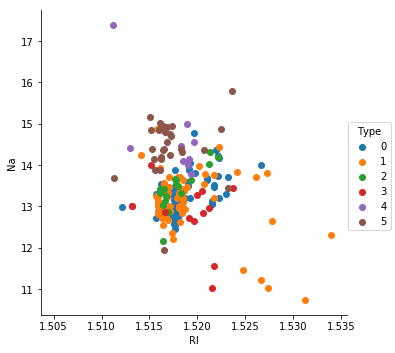

In [17]:
sns.FacetGrid(g, hue="Type", size=5).map(plt.scatter, "RI", "Na").add_legend()

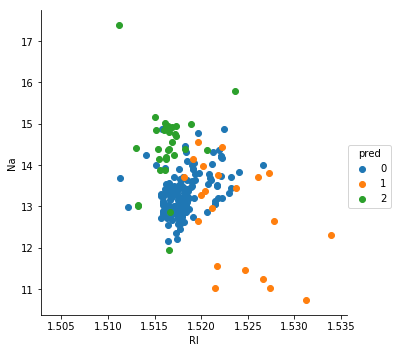

In [18]:
sns.FacetGrid(g, hue="pred", size=5).map(plt.scatter, "RI", "Na").add_legend()

In [19]:
# Performance Metrics
sm.accuracy_score(g.Type, cluster_model.labels_)

0.38317757009345793

In [21]:
from sklearn import metrics

In [22]:
metrics.adjusted_rand_score(g.Type, cluster_model.labels_)  #adjusted Rand index is a 
#function that measures the similarity of the two assignments

0.22583722451857843

# how to select clusers?

## elbow method

In [20]:
from scipy.spatial.distance import cdist

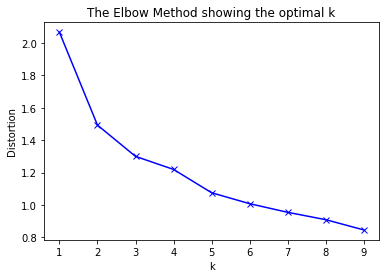

In [43]:
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
 
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(g_matrix)
    kmeanModel.fit(g_matrix)
    distortions.append(sum(np.min(cdist(g_matrix, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / g_matrix.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()